<a href="https://colab.research.google.com/github/premsharma2206/Covid19prediction/blob/master/Covid19IndiaPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of spread of Covid19 using machine learning


*Importing the required libraries...*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

* Prediction of cases in **India**

Reading the datasets...


In [4]:

df=pd.read_csv('/content/datasets_549966_1276225_complete.csv')

df.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [10]:
df2=df.drop(['New deaths','New recovered'],axis=1) 
df2.head()


,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0


In [11]:
df=df2.groupby(["Date"])[['Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases']].sum().reset_index()
df.tail()



,Date,Cured/Discharged/Migrated,Death,Total Confirmed cases
141,2020-06-19,204711,12573,371605
142,2020-06-20,213831,12948,385783
143,2020-06-21,227756,13254,401334
144,2020-06-22,237196,13699,417450
145,2020-06-23,248190,14011,432200


In [12]:
confirmedindia = df.groupby('Date').sum()['Total Confirmed cases'].reset_index()
deathsindia = df.groupby('Date').sum()['Death'].reset_index()
recoveredindia = df.groupby('Date').sum()['Cured/Discharged/Migrated'].reset_index()

In [13]:
f=go.Figure()
f.add_trace(go.Scatter(x=confirmedindia['Date'], y=confirmedindia['Total Confirmed cases'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
f.add_trace(go.Scatter(x=deathsindia['Date'], y=deathsindia['Death'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
f.add_trace(go.Scatter(x=recoveredindia['Date'], y=recoveredindia['Cured/Discharged/Migrated'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
f.update_layout(title='COVID19 Cases in India', xaxis_tickfont_size=14,yaxis=dict(title='No. of Cases'))
f.show()

**Forecasting cases in India using Prophet**


In [14]:
from fbprophet import Prophet

In [15]:
confirmedindia.columns = ['ds','y']
confirmedindia['ds'] = pd.to_datetime(confirmedindia['ds'])

In [16]:
confirmedindia.tail()

,ds,y
141,2020-06-19,371605
142,2020-06-20,385783
143,2020-06-21,401334
144,2020-06-22,417450
145,2020-06-23,432200


In [34]:
m = Prophet(interval_width=1.0)
m.fit(confirmedindia)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
148,2020-06-26
149,2020-06-27
150,2020-06-28
151,2020-06-29
152,2020-06-30


In [35]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
148,2020-06-26,433506.602443,416798.932287,451043.243591
149,2020-06-27,443467.242103,425167.629494,462201.171985
150,2020-06-28,453666.037493,433815.351011,473282.302629
151,2020-06-29,463674.140267,442349.323568,481629.205019
152,2020-06-30,473388.578858,444887.861282,492671.200966


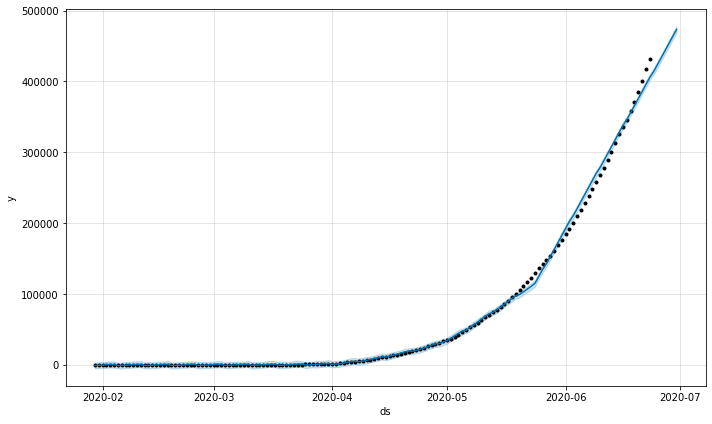

In [27]:
confirmed_forecast_plot = m.plot(forecast)

In [28]:
deathsindia.columns = ['ds','y']
deathsindia['ds'] = pd.to_datetime(deathsindia['ds'])

In [29]:
deathsindia.tail()

,ds,y
141,2020-06-19,12573
142,2020-06-20,12948
143,2020-06-21,13254
144,2020-06-22,13699
145,2020-06-23,14011


In [32]:
m = Prophet(interval_width=1.0)
m.fit(deathsindia)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
148,2020-06-26
149,2020-06-27
150,2020-06-28
151,2020-06-29
152,2020-06-30


In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
148,2020-06-26,13628.761160,12513.425642,14762.190447
149,2020-06-27,13943.331279,12642.299981,15168.783068
150,2020-06-28,14250.225656,12994.845893,15376.515605
151,2020-06-29,14557.541900,13118.824902,15823.850583
152,2020-06-30,14863.668492,13430.865872,16187.359798


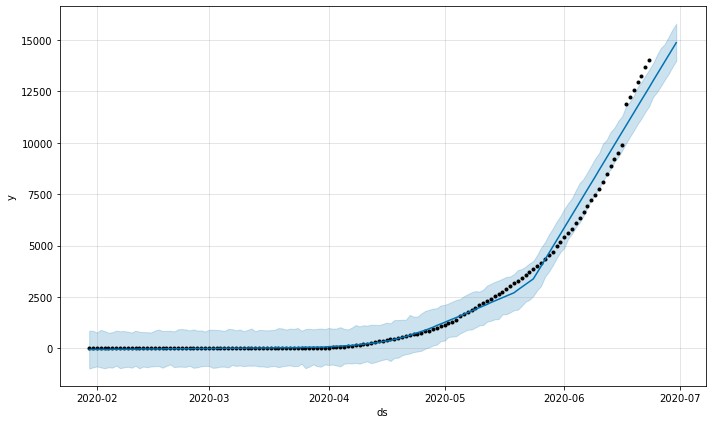

In [24]:
deaths_forecast_plot=m.plot(forecast)